# True solution of damped harmonic oscillator for w0=1

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import scipy
import time
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [17]:
def gamma(alpha):
    return np.sqrt(alpha**2-1)

def C2(y0, yp0, alpha):
    return (gamma(alpha)*y0 - alpha*y0 - yp0)/(2*gamma(alpha))

def C1(y0, yp0, alpha):
    return y0 - C2(y0, yp0, alpha)

def DAH(alpha, y0, yp0, t):
    a = C1(y0, yp0, alpha)*np.exp(-(alpha - gamma(alpha))*t)
    b = C2(y0, yp0, alpha)*np.exp(-(alpha + gamma(alpha))*t)
    return a + b

def dDAH(alpha, y0, yp0, t):
    a = -(alpha-gamma(alpha))*C1(y0, yp0, alpha)*np.exp(-(alpha - gamma(alpha))*t)
    b = -(alpha+gamma(alpha))*C2(y0, yp0, alpha)*np.exp(-(alpha + gamma(alpha))*t)
    return a + b

In [36]:
y0 = 1
yp0 = 0.5
alpha = 5

def y_DAH(t, alpha=alpha, y0=y0, yp0=yp0):
    return DAH(alpha, y0, yp0, t)

def dy_DAH(t, alpha=alpha, y0=y0, yp0=yp0):
    return dDAH(alpha, y0, yp0, t)

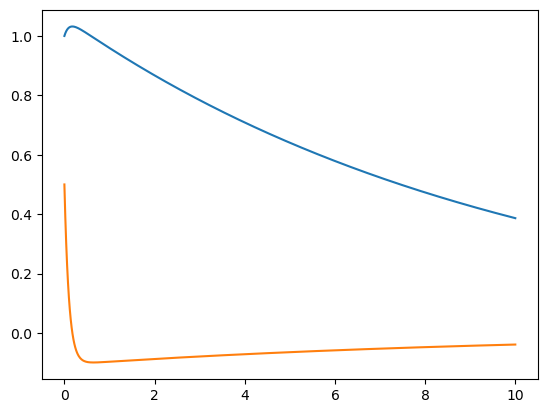

In [39]:
x = np.linspace(0, 10, 1000)
y = y_DAH(x)
dy = dy_DAH(x)

plt.plot(x, y)
plt.plot(x, dy)